






<h2 id='part1'>A Look at the Data</h2>


First, let's read in the data and necessary libraries.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../data/stack_overflow_2014/2014 Stack Overflow Survey Responses.csv') #Uncomment for 2014
# df = pd.read_csv('../data/stack_overflow_2017/survey_results_public.csv') #Uncomment for 2017
# df = pd.read_csv('../data/stack_overflow_2020/survey_results_public.csv') #Uncomment for 2020

df.head()

,What Country do you live in?,Unnamed: 1,Which US State or Territory do you live in?,How old are you?,What is your gender?,How many years of IT/Programming experience do you have?,Which of the following best describes your occupation?,"Including bonus, what is your annual compensation in USD?",How would you best describe the industry you currently work in?,How many developers are employed at your company?,...,Did you participate in the Apptivate contest?,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,How do you use Stack Overflow?,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,How often do you find solutions to your programming problems on Stack Overflow without asking a new question?
0,Response,Other (please specify),Response,Response,Response,Response,Response,Response,Response,Response,...,Response,Open-Ended Response,Response,Read other people's questions to solve my prob...,Ask questions to solve problems,Answer questions I know the answer to,Looking for a job,Build my online reputation,Other (please specify),Response
1,India,NaN,NaN,30-34,Female,6/10/2014,Back-End Web Developer,"$20,000 - $40,000",Finance / Banking,100,...,No,NaN,500,Read other people's questions to solve my prob...,Ask questions to solve problems,NaN,NaN,NaN,NaN,Almost Always
2,Thailand,NaN,NaN,20-24,Male,<2,Back-End Web Developer,Student / Unemployed,Healthcare,NaN,...,NaN,NaN,Don't have an account,Read other people's questions to solve my prob...,NaN,NaN,NaN,NaN,NaN,NaN
3,Iran,NaN,NaN,25-29,Male,6/10/2014,Desktop Software Developer,"<$20,000",Not Currently Employed,1/5/2014,...,No,Tehcodez,1,Read other people's questions to solve my prob...,NaN,NaN,NaN,NaN,NaN,Almost Always
4,Ukraine,NaN,NaN,< 20,Male,<2,Student,Student / Unemployed,Student,NaN,...,NaN,NaN,50,Read other people's questions to solve my prob...,Ask questions to solve problems,NaN,NaN,NaN,NaN,Almost Always



**1.** Let's # of rows and columns

In [70]:
# We solved this one for you by providing the number of rows and columns:
# You can see how we are prompted that we solved for the number of rows and cols correctly!

num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

print("Rows in the dataset: ", num_rows, "; Colums in the dataset: ", num_cols)

Rows in the dataset:  7644 ; Colums in the dataset:  120



**2.** Which columns have no missing values?

In [71]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.

print(no_nulls)

{'What Country do you live in?'}


**3.** Which columns have the most missing values?  

In [72]:
#Threshold used for the null identification 
null_threshold = 0.75 

#Provide a set of columns with a portion of values missing > than the threshold
most_missing_cols = set(df.columns[df.isnull().mean() > null_threshold])

print("Columns with more than ", null_threshold*100, "% of missing values :")
most_missing_cols

Columns with more than  75.0 % of missing values :


{'Unnamed: 1',
 'Unnamed: 116',
 'Unnamed: 118',
 'Unnamed: 14',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 35',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 43',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50',
 'Unnamed: 51',
 'Unnamed: 53',
 'Unnamed: 55',
 'Unnamed: 56',
 'Unnamed: 57',
 'Unnamed: 58',
 'Unnamed: 59',
 'Unnamed: 60',
 'Unnamed: 61',
 'Unnamed: 62',
 'Unnamed: 63',
 'Unnamed: 64',
 'Unnamed: 65',
 'Unnamed: 66',
 'Unnamed: 70',
 'Unnamed: 71',
 'Unnamed: 72',
 'Unnamed: 73',
 'Unnamed: 74',
 'Unnamed: 75',
 'Unnamed: 76',
 'Unnamed: 77',
 'Unnamed: 78',
 'Unnamed: 79',
 'Unnamed: 80',
 'Unnamed: 81',
 'Unnamed: 84',
 'What advertisers do you remember seeing on Stack Overflow?',
 'Which of the following languages or technologies have you used significantly in the past year?',
 'Which technology products do you own? (You can choose more than one)'}

**4.** Provide a pandas series of the different **Professional** status values in the dataset.  Store this pandas series in **status_vals**. 

In [56]:
#Provide a pandas series of the counts for each Professional status
# status_vals = df.Professional.value_counts() #2017
status_vals = df.MainBranch.value_counts() #2020


status_vals

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

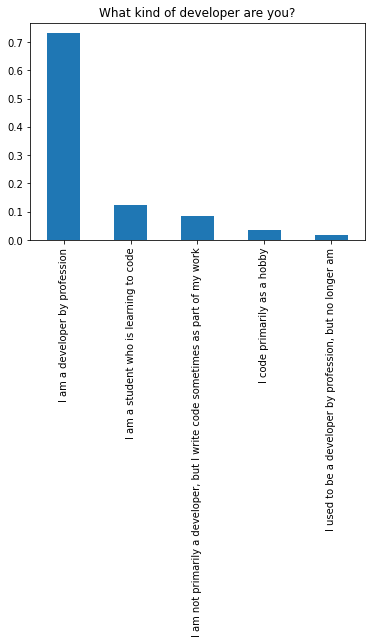

In [57]:
#Bar chart of the proportion of individuals in each professional category 

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What kind of developer are you?");

**5.** Provide a pandas series of the different **FormalEducation** status values in the dataset.  Store this pandas series in **ed_vals**. 

In [58]:
#Provide a pandas series of the counts for each FormalEducation status
# ed_vals = df.FormalEducation.value_counts() #2017
ed_vals = df.EdLevel.value_counts() #2020

ed_vals

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

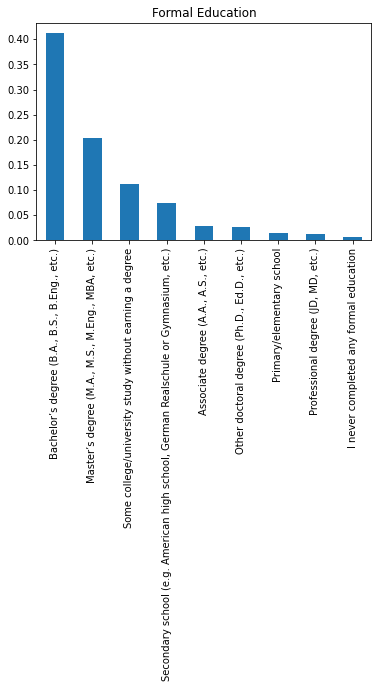

In [59]:
# Bar chart of the proportion of individuals in ed_vals

(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

**6.** Pandas series of the different **Country** values in the dataset.  Store this pandas series in **count_vals**. 

In [65]:
#Provide a pandas series of the counts for each Country
count_vals = df.Country.value_counts()

count_vals

United States                     11455
India                              5197
United Kingdom                     4395
Germany                            4143
Canada                             2233
                                  ...  
Chad                                  1
S. Georgia & S. Sandwich Isls.        1
Gibraltar                             1
Lesotho                               1
Christmas Island                      1
Name: Country, Length: 201, dtype: int64

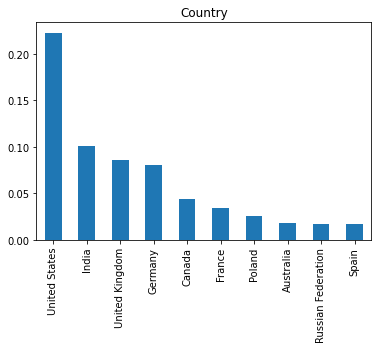

In [66]:
# Bar chart of the proportion of the top 10 countries for the individuals in count_vals

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

**7.** Pandas series of the different **Gender** values in the dataset.  Store this pandas series in **gend_vals**. 

In [67]:
#Provide a pandas series of the counts for each Gender
gend_vals = df.Gender.value_counts()

gend_vals

Male                                                       31589
Female                                                      2600
Other                                                        225
Male; Other                                                  171
Gender non-conforming                                        160
Male; Gender non-conforming                                   65
Female; Transgender                                           56
Transgender                                                   55
Female; Gender non-conforming                                 29
Male; Female                                                  15
Transgender; Gender non-conforming                            15
Male; Female; Transgender; Gender non-conforming; Other       15
Male; Transgender                                             11
Female; Transgender; Gender non-conforming                     8
Male; Female; Transgender; Gender non-conforming               7
Male; Female; Transgender

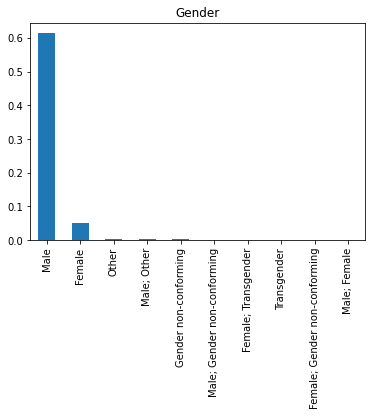

In [68]:
# Bar chart of the proportion of the top 10 values for the individuals in gend_vals

(gend_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Gender");